In [4]:
# imports
import numpy as np
import pandas as pd
from scipy.special import expit  # für Sigmoid

<img src="image-2.png" alt="Bildbeschreibung" width="40%"/>


### Forward Method: 
<img src="image.png" alt="Bildbeschreibung" width="40%"/>


### Gradient Calculation
<img src="image-3.png" alt="Bildbeschreibung" width="40%"/>


In [5]:
class NeuralNetwork:
    def __init__(self, input_size = 8, hidden1_size=100, hidden2_size = 50, output_size = 1, lr=0.1):
        
        # Learning rate
        self.lr = lr
        # Weights and biases
        # Input -> Hidden1
        self.w0 = np.random.randn(hidden1_size, input_size) * 0.01
        self.b0 = np.zeros((hidden1_size, 1))

        # # Hidden1 → hidden2
        self.w1 = np.random.randn(hidden2_size, hidden1_size) * 0.01
        self.b1 = np.zeros((hidden2_size, 1))


        # Hidden2 -> Output
        self.w2 = np.random.randn(output_size, hidden2_size) * 0.01
        self.b2 = np.zeros((output_size, 1))

        # Activation values
        self.a0 = None
        self.a1 = None
        self.a2 = None

        
    # Sigmoid function
    def sigmoid(self, x):
        return expit(x)  
    
    # Derivative of sigmoid function
    def sigmoid_deriv(self, a):
        return a * (1 - a) 
    
    # Loss function
    def loss(self, y_true, y_pred):
        #m = y_true.shape[1] # m = number of samples
        loss = 0.5 * np.sum((y_true - y_pred)**2)  
        return loss

    # Derivative of loss function    
    def loss_deriv(self, y_true, y_pred):
        #m = y_true.shape[1]
        return (y_pred - y_true) # / m
    
    # Forward pass
    def forward(self, X):
        self.X = X  

        ### 1. Hidden Layer
        # X.T: (input_size, m)
        # z0 = W0 @ X_T + b0 
        # a0 = sig(z0)
        self.a0 = self.sigmoid(self.w0 @ X.T + self.b0)  # a0.shape (hidden_size, m) -> (100, 614)
        
        ### 2. hidden layer 
        # z1 = W1 @ a0 + b1
        # a1 = sig(z1)
        self.a1 = self.sigmoid(self.w1 @ self.a0 + self.b1)  # a1.shape: (output_size, m) -> (2, 614)

        # output Layer
        self.a2 = self.sigmoid(self.w2 @ self.a1 + self.b2) 
        
        return self.a2

    # Backward pass
    def backward(self, X, y_true):

        Y = y_true.T      # (output_size, m)
        m = Y.shape[1]    # samples

        y_true = y_true.T 

        ### OUTPUT LAYER
        # delta2 = self.a1 - y_true.T # optional this simple calculation
        delta2 = self.loss_deriv(Y, self.a2) * self.sigmoid_deriv(self.a2)

        # Gradients for w2, b2: 
        dw2 = (delta2 @ self.a1.T) / m  
        db2 = np.sum(delta2, axis=1, keepdims=True) / m

        ### HIDDEN LAYER 2
        # (weights output layer x error output layer) * derived activation 
        delta1 = (self.w2.T @ delta2) * self.sigmoid_deriv(self.a1)

        # Gradients for w1, b1:
        # dw1: error in hidden layer 1 * outputs from hiddenlayer 2 (a2)
        dw1 = delta1 @ self.a0.T / m
        db1 = np.sum(delta1, axis=1, keepdims=True) / m # sum errors in current layer

        ### HIDDEN LAYER 1
        # Error back to the previous layer 
        delta0 = (self.w1.T @ delta1) * self.sigmoid_deriv(self.a0)

        # Gradients for w0, b0: 
        dw0 = (delta0 @ self.X) / m
        db0 = np.sum(delta0, axis=1, keepdims=True) / m

        # Update
        self.w2 -= self.lr * dw2
        self.b2 -= self.lr * db2
        self.w1 -= self.lr * dw1
        self.b1 -= self.lr * db1
        self.w0 -= self.lr * dw0
        self.b0 -= self.lr * db0

    def train(self, X, y):
        # Get the prediciton for current wheights
        y_pred = self.forward(X)

        # Compute the loss 
        current_loss = self.loss(y.T, y_pred)

        # Update the weights and biases
        self.backward(X, y)

        return current_loss

    def predict(self, X):
        a1 = self.forward(X)
        return a1.T




### Load and Prepare Data

In [6]:
# Load csv file with pandas
df = pd.read_csv('data/diabetes.csv')

# drop all na values
df = df.dropna()

In [8]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# head of the dataset
#print(df.head())
# shape of the dataset
#print(df.shape)

# one hot encoding of the target variable
X = df.drop('Outcome', axis=1).values  # shape: (n_samples, 8)
y = df['Outcome'].values.reshape(-1, 1)  # shape: (n_samples, 1)

# Skalieren der Eingabedaten
scaler = StandardScaler()
X = scaler.fit_transform(X)

# One-Hot-Encoding der Zielvariable
encoder = OneHotEncoder()
y_oh = encoder.fit_transform(y).toarray()

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y_oh, test_size=0.2, random_state=42)


### Train the Network 

In [5]:
model = NeuralNetwork(input_size=8, hidden1_size=100, hidden2_size = 50, output_size=2, lr=0.2)

# X_train: (n_samples, 784), y_train_oh: (n_samples, 10)
epochs = 100
losses = []
for epoch in range(epochs):
    loss = model.train(X_train, y_train)
    losses.append(loss)
    if epoch % 10 == 0:
        print(f"Epoch {epoch}: Loss = {loss:.4f}")






Epoch 0: Loss = 152.4537
Epoch 10: Loss = 139.5362
Epoch 20: Loss = 139.1284
Epoch 30: Loss = 139.1103
Epoch 40: Loss = 139.1094
Epoch 50: Loss = 139.1093
Epoch 60: Loss = 139.1092
Epoch 70: Loss = 139.1091
Epoch 80: Loss = 139.1091
Epoch 90: Loss = 139.1090


In [6]:
tolerance = 1e-4   
patience = 200             
best_loss = float('inf')  
no_improvement = 0      
max_epochs = 10000000      

for epoch in range(max_epochs):
    loss = model.train(X_train, y_train)
    losses.append(loss)

    if epoch % 1000 == 0:
        print(f"Epoch {epoch}: Loss = {loss:.4f}")

    #
    if best_loss - loss > tolerance:
        best_loss = loss
        no_improvement = 0
    else:
        no_improvement += 1

    # 
    if no_improvement >= patience:
        print(f"\n🛑 Stop after erpch: {epoch}. no decresment after {patience} epochs")
        break

Epoch 0: Loss = 139.1089
Epoch 1000: Loss = 139.1021
Epoch 2000: Loss = 139.0918
Epoch 3000: Loss = 139.0723
Epoch 4000: Loss = 139.0293
Epoch 5000: Loss = 138.9134
Epoch 6000: Loss = 138.4191
Epoch 7000: Loss = 130.6040
Epoch 8000: Loss = 94.8590
Epoch 9000: Loss = 92.7608
Epoch 10000: Loss = 92.6135
Epoch 11000: Loss = 92.5477
Epoch 12000: Loss = 92.4853
Epoch 13000: Loss = 92.4053
Epoch 14000: Loss = 92.2789
Epoch 15000: Loss = 92.0689
Epoch 16000: Loss = 91.7504
Epoch 17000: Loss = 91.3150


KeyboardInterrupt: 

Accuracy: 0.7662


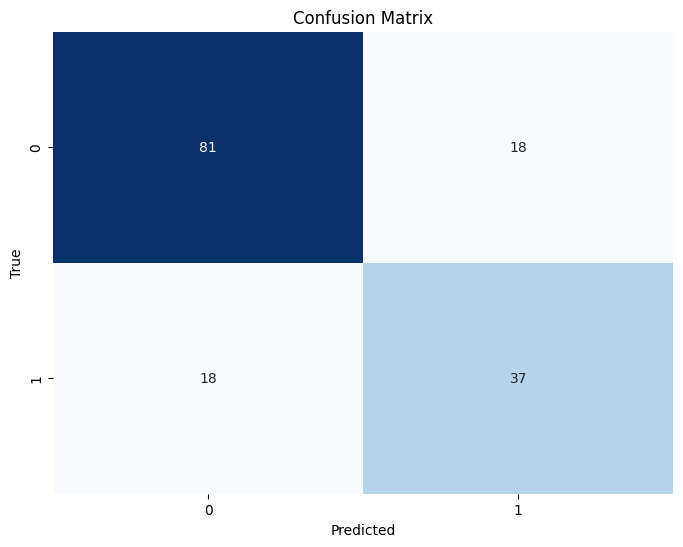

In [7]:
# Predict 
y_pred = model.predict(X_test)
# Convert predictions to binary
y_pred_binary = np.argmax(y_pred, axis=1)
y_test_binary = np.argmax(y_test, axis=1)

# Calculate accuracy
accuracy = np.mean(y_pred_binary == y_test_binary)
print(f"Accuracy: {accuracy:.4f}")

# confussion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test_binary, y_pred_binary)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# install pytorch 



In [9]:
import torch
from torch.utils.data import DataLoader, TensorDataset

import torch.nn as nn
import torch.optim as optim

# Definition des neuronalen Netzes
class NeuralNetworkPyTorch(nn.Module):
    def __init__(self, input_size=8, hidden1_size=100, hidden2_size=50, output_size=2):
        super(NeuralNetworkPyTorch, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden1_size)
        self.fc2 = nn.Linear(hidden1_size, hidden2_size)
        self.fc3 = nn.Linear(hidden2_size, output_size)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.sigmoid(self.fc1(x))
        x = self.sigmoid(self.fc2(x))
        x = self.fc3(x)  # Letzte Schicht ohne Aktivierungsfunktion (für CrossEntropyLoss)
        return x

# Hyperparameter
input_size = 8
hidden1_size = 100
hidden2_size = 50
output_size = 2
lr = 0.2
epochs = 100

# Daten in Torch-Tensoren umwandeln
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

# Dataset und DataLoader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# Modell, Loss und Optimizer
model = NeuralNetworkPyTorch(input_size, hidden1_size, hidden2_size, output_size)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=lr)

# Training
for epoch in range(epochs):
    model.train()
    epoch_loss = 0.0
    for batch_X, batch_y in train_loader:
        optimizer.zero_grad()
        outputs = model(batch_X)
        loss = criterion(outputs, torch.argmax(batch_y, dim=1))
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
    if epoch % 10 == 0:
        print(f"Epoch {epoch}: Loss = {epoch_loss:.4f}")

# Evaluation
model.eval()
with torch.no_grad():
    y_pred = model(X_test_tensor)
    y_pred_classes = torch.argmax(y_pred, dim=1).numpy()
    y_test_classes = torch.argmax(y_test_tensor, dim=1).numpy()
    accuracy = (y_pred_classes == y_test_classes).mean()
    print(f"Accuracy: {accuracy:.4f}")

Epoch 0: Loss = 12.9420
Epoch 10: Loss = 10.5729
Epoch 20: Loss = 9.9717
Epoch 30: Loss = 9.3084
Epoch 40: Loss = 9.2759
Epoch 50: Loss = 9.3603
Epoch 60: Loss = 9.1059
Epoch 70: Loss = 9.4952
Epoch 80: Loss = 9.3354
Epoch 90: Loss = 9.2253
Accuracy: 0.7662
